In [1]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from tqdm import tqdm
import random
import json
import glob

# Directory with all PNG images

In [3]:
MODE = 0o666

# replace it with the path where your "dataset" folder is :-
PARENT_DIR = "D:/TU STUDIES related/SEMESTER 7/Project_Material"

def create_folder(DIR_PATH, folder_name, MODE):
    
    ''' create a new folder whose path - DIR_PATH/folder_name '''
    
    if not os.path.exists(DIR_PATH + "/" + folder_name):
        path = os.path.join(DIR_PATH, folder_name) 
        os.mkdir(path, MODE)
        print(DIR_PATH + "/" + folder_name , "created successfully")
        
home_dir = "liver_dataset"
create_folder(PARENT_DIR, home_dir, MODE)

DATASET_DIR = PARENT_DIR + "/" + home_dir
sub_dir = ["image", "mask"]

for dir_name in sub_dir:
    create_folder(DATASET_DIR, dir_name, MODE)

In [3]:
#saving the image paths so that it can be directly accessed

nii_file_path = PARENT_DIR + "/dataset/liver nifti dataset lits"

if __name__ == "__main__":
    
    folder_list = os.listdir(nii_file_path)
    print(folder_list)
    
    segmentation_dir = folder_list[0]
    images_dir_list = folder_list[1:]
    
    print(segmentation_dir)
    print(images_dir_list)
    
    image_path_list = []
    mask_path_list = []
    

    for folder in images_dir_list:
        image_input_path = nii_file_path + "/" + folder
        mask_input_path = nii_file_path + "/" + segmentation_dir
        img_list = os.listdir(image_input_path)
        for each_image in img_list:
            image_path = image_input_path + "/" + each_image
            image_path_list.append(image_path)
            each_mask = each_image.replace("volume", "segmentation")
            mask_path = mask_input_path + "/" + each_mask
            mask_path_list.append(mask_path)
        
        
    # display the paths stored for the images
    for each in image_path_list:
        print(each)
    for each in mask_path_list:
        print(each)
        
    

['segmentations', 'volume_pt1', 'volume_pt2', 'volume_pt3', 'volume_pt4', 'volume_pt5', 'volume_pt6', 'volume_pt8']
segmentations
['volume_pt1', 'volume_pt2', 'volume_pt3', 'volume_pt4', 'volume_pt5', 'volume_pt6', 'volume_pt8']
D:/TU STUDIES related/SEMESTER 7/Project_Material/dataset/liver nifti dataset lits/volume_pt1/volume-0.nii
D:/TU STUDIES related/SEMESTER 7/Project_Material/dataset/liver nifti dataset lits/volume_pt1/volume-1.nii
D:/TU STUDIES related/SEMESTER 7/Project_Material/dataset/liver nifti dataset lits/volume_pt1/volume-10.nii
D:/TU STUDIES related/SEMESTER 7/Project_Material/dataset/liver nifti dataset lits/volume_pt1/volume-2.nii
D:/TU STUDIES related/SEMESTER 7/Project_Material/dataset/liver nifti dataset lits/volume_pt1/volume-3.nii
D:/TU STUDIES related/SEMESTER 7/Project_Material/dataset/liver nifti dataset lits/volume_pt1/volume-4.nii
D:/TU STUDIES related/SEMESTER 7/Project_Material/dataset/liver nifti dataset lits/volume_pt1/volume-5.nii
D:/TU STUDIES related

In [12]:
image_output_folder = DATASET_DIR + "/" + sub_dir[0]
mask_output_folder = DATASET_DIR + "/" + sub_dir[1]

In [25]:
# to save the images and masks
counter_image = 0
counter_mask = 0

def nii_to_png(nii_file_path, output_folder, counter):
    # Load the NIfTI image
    img = nib.load(nii_file_path)
    img_data = img.get_fdata()

    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Iterate through each slice and save as PNG
    for i in range(img_data.shape[2]):
        # Extract the i-th slice
        slice_data = img_data[:, :, i]

        # Save the slice as PNG
        output_png_path = os.path.join(output_folder, f"{counter}.png")
        cv2.imwrite(output_png_path, slice_data)
        counter += 1 
        
        
    return counter



for img in image_path_list:
    counter_image = nii_to_png(img, image_output_folder, counter_image)
    
for mask in mask_path_list:
    counter_mask = nii_to_png(mask, mask_output_folder, counter_mask)

In [27]:
# use of mask png images done

mask_list_0 = []
mask_list = []

list_of_mask = os.listdir(mask_output_folder)

for i in tqdm(range(len(list_of_mask))):
    path = mask_output_folder + "/" + list_of_mask[i]
    image = mpimg.imread(path)
    unique_nos = np.unique(image)
    if(len(unique_nos) == 1):
        mask_list_0.append(list_of_mask[i])
    else:
        mask_list.append(list_of_mask[i])

  0%|          | 0/58638 [00:00<?, ?it/s]

100%|██████████| 58638/58638 [04:52<00:00, 200.17it/s]


In [30]:
print(len(mask_list_0))
print(len(mask_list))

39475
19163


# Final directory with test and train images

In [9]:
new_home_dir = "liver_dataset_improoved"
create_folder(PARENT_DIR, new_home_dir, MODE)

NEW_DATASET_DIR = PARENT_DIR + "/" + new_home_dir
new_sub_dir = ["test", "train", "train2"]
sub_sub_dir = ["image", "mask"]

for dir_name in new_sub_dir:
    create_folder(NEW_DATASET_DIR, dir_name, MODE)
    PATH = NEW_DATASET_DIR + "/" + dir_name
    for each_dir in sub_sub_dir:
        create_folder(PATH, each_dir, MODE)

In [10]:
test_file_path = NEW_DATASET_DIR + "/" + 'test_file.json'
train_file_path = NEW_DATASET_DIR + "/" + "train_file.json"

### don't run this (unless necessary)

In [44]:
# percent_to_choose = 0.10
# num_to_choose = int(len(mask_list) * percent_to_choose)

# temp_test = random.sample(mask_list, num_to_choose)

# temp_train =  [element for element in mask_list if element not in temp_test]

# print(temp_test)
# print(len(temp_test))
# print(temp_train)
# print(len(temp_train))

# # Save the list to a file
# with open(test_file_path, 'w') as file:
#     json.dump(temp_test, file)
    
# with open(train_file_path, 'w') as file:
#     json.dump(temp_train, file)

['51699.png', '28625.png', '24926.png', '33056.png', '15873.png', '16874.png', '51061.png', '44576.png', '33849.png', '42883.png', '39939.png', '51081.png', '7703.png', '19725.png', '16344.png', '36566.png', '31549.png', '35661.png', '22356.png', '55851.png', '58499.png', '9162.png', '33960.png', '3605.png', '3472.png', '39705.png', '8288.png', '49219.png', '25730.png', '16859.png', '57373.png', '1088.png', '9829.png', '7115.png', '15623.png', '27761.png', '16072.png', '42030.png', '34781.png', '4679.png', '15472.png', '9907.png', '3574.png', '25750.png', '6092.png', '53261.png', '15319.png', '5573.png', '25663.png', '11225.png', '24546.png', '12718.png', '19507.png', '17089.png', '57942.png', '22576.png', '64.png', '46114.png', '39718.png', '3569.png', '6562.png', '55879.png', '57478.png', '21642.png', '55922.png', '44449.png', '55864.png', '32283.png', '10670.png', '20481.png', '11351.png', '39714.png', '13744.png', '16290.png', '54659.png', '46646.png', '57497.png', '45278.png', '38

In [13]:
test = []
with open(test_file_path, 'r') as file:
    test = json.load(file)
    
train = []
with open(train_file_path, 'r') as file:
    train = json.load(file)
    
ctr = 1
for each in test:
    
    for dir in sub_sub_dir:
        output_folder = ""
        if dir == "image":
            output_folder = image_output_folder
        else:
            output_folder = mask_output_folder
            
        image_src = output_folder + '/' + each
        img = cv2.imread(image_src, cv2.IMREAD_UNCHANGED)
        DIR = NEW_DATASET_DIR + "/" + new_sub_dir[0] +  "/" + dir
        if(not os.getcwd() == DIR ):
            os.chdir(DIR)
        cv2.imwrite("" + str(ctr) + ".png", img) 
    
    ctr += 1
        
ctr = 1
for each in train:
    
    for dir in sub_sub_dir:
        output_folder = ""
        if dir == "image":
            output_folder = image_output_folder
        else:
            output_folder = mask_output_folder
            
        image_src = output_folder + '/' + each
        img = cv2.imread(image_src, cv2.IMREAD_UNCHANGED)
        DIR = NEW_DATASET_DIR + "/" + new_sub_dir[1] +  "/" + dir
        if(not os.getcwd() == DIR ):
            os.chdir(DIR)
        cv2.imwrite("" + str(ctr) + ".png", img) 
        
    ctr += 1

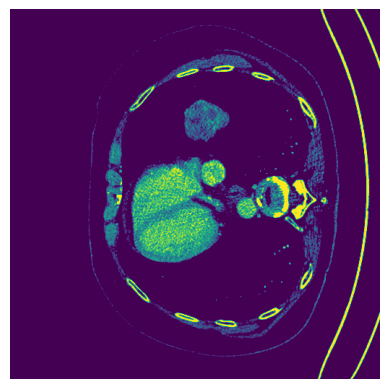

(512, 512)
[0.         0.00392157 0.00784314 0.01176471 0.01568628 0.01960784 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313726 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451  0.06666667 0.07058824 0.07450981 0.07843138 0.08235294 0.08627451 0.09019608 0.09411765 0.09803922 0.10196079 0.10588235 0.10980392 0.11372549 0.11764706 0.12156863 0.1254902  0.12941177 0.13333334 0.13725491 0.14117648 0.14509805 0.14901961 0.15294118 0.15686275 0.16078432 0.16470589 0.16862746 0.17254902 0.1764706  0.18039216 0.18431373 0.1882353  0.19215687 0.19607843 0.2        0.20392157 0.20784314 0.21176471 0.21568628 0.21960784 0.22352941 0.22745098 0.23137255 0.23529412 0.23921569 0.24313726 0.24705882 0.2509804  0.25490198 0.25882354 0.2627451  0.26666668 0.27058825 0.27450982 0.2784314  0.28235295 0.28627452 0.2901961  0.29411766 0.29803923 0.3019608  0.30588236 0.30980393 0.3137255  0.31764707 0.32156864 0.3254902  0.32941177 0.33333334 0.3372549  0.34117648 0.34509805 0.3490196

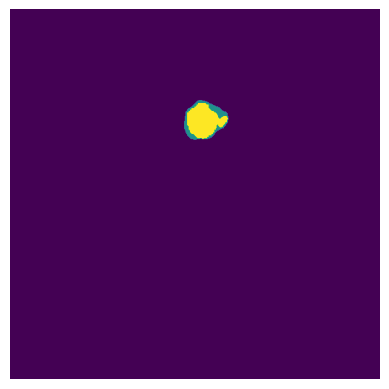

(512, 512)
[0.         0.00392157 0.00784314]


In [14]:
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

img_no = 10000

image_path = NEW_DATASET_DIR + "/" + new_sub_dir[1] +  "/" + sub_sub_dir[0] +  "/" + str(img_no) +".png"
mask_path = NEW_DATASET_DIR + "/" + new_sub_dir[1] +  "/" + sub_sub_dir[1] +  "/" + str(img_no) +".png"

image = mpimg.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()
print(image.shape)
print(np.unique(image))


mask = mpimg.imread(mask_path)
plt.imshow(mask)
plt.axis('off')
plt.show()
print(mask.shape)
print(np.unique(mask))

In [16]:
x = NEW_DATASET_DIR + "/" + new_sub_dir[1] +  "/" + sub_sub_dir[1]
list = os.listdir(x)

for single in list:
    path_est = x + "/" + single
    print(single)
    img = cv2.imread(path_est, cv2.IMREAD_UNCHANGED)
    print(np.unique(img))

1.png
[0 1]
10.png
[0 1]
100.png
[0 1]
1000.png
[0 1]
10000.png
[0 1 2]
10001.png
[0 1 2]
10002.png
[0 1 2]
10003.png
[0 1 2]
10004.png
[0 1 2]
10005.png
[0 1 2]
10006.png
[0 1]
10007.png
[0 1]
10008.png
[0 1]
10009.png
[0 1]
1001.png
[0 1]
10010.png
[0 1]
10011.png
[0 1]
10012.png
[0 1]
10013.png
[0 1]
10014.png
[0 1]
10015.png
[0 1]
10016.png
[0 1]
10017.png
[0 1]
10018.png
[0 1]
10019.png
[0 1]
1002.png
[0 1]
10020.png
[0 1]
10021.png
[0 1]
10022.png
[0 1]
10023.png
[0 1]
10024.png
[0 1]
10025.png
[0 1]
10026.png
[0 1]
10027.png
[0 1]
10028.png
[0 1]
10029.png
[0 1]
1003.png
[0 1]
10030.png
[0 1]
10031.png
[0 1]
10032.png
[0 1]
10033.png
[0 1]
10034.png
[0 1]
10035.png
[0 1]
10036.png
[0 1]
10037.png
[0 1]
10038.png
[0 1]
10039.png
[0 1]
1004.png
[0 1]
10040.png
[0 1]
10041.png
[0 1]
10042.png
[0 1]
10043.png
[0 1]
10044.png
[0 1 2]
10045.png
[0 1 2]
10046.png
[0 1 2]
10047.png
[0 1 2]
10048.png
[0 1 2]
10049.png
[0 1 2]
1005.png
[0 1]
10050.png
[0 1 2]
10051.png
[0 1 2]
10052.png
[

KeyboardInterrupt: 

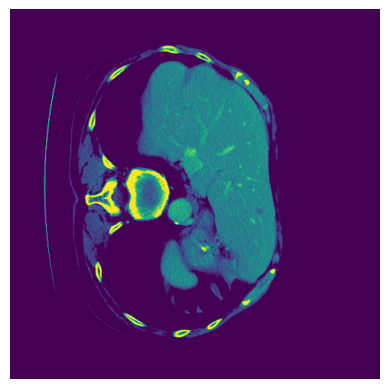

(512, 512)


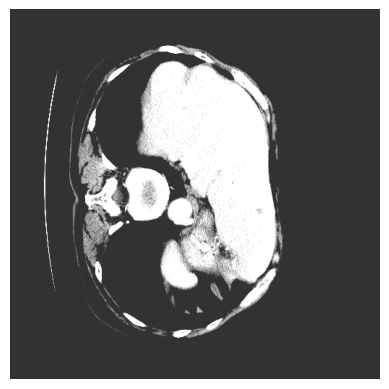

(512, 512, 3)


In [27]:

# for increasing and decreasing contrast

np.set_printoptions(threshold=np.inf, linewidth=np.inf)

def increase_contrast(image_path, alpha=2, beta=50):
    # alpha is for contrast and beta is for brightness
    # Read the image using cv2
    img = cv2.imread(image_path)

    # Apply contrast adjustment using the formula: new_pixel = alpha * pixel_value + beta
    contrasted = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

    # Save the adjusted image
    plt.imshow(contrasted)
    plt.axis('off')
    plt.show()
    # print(contrasted)
    print(contrasted.shape)


list = os.listdir(image_output_folder)

path = image_output_folder + "/" + list[66]
image = mpimg.imread(path)
plt.imshow(image)
plt.axis('off')
plt.show()
print(image.shape)
# print(image)

increase_contrast(path)



In [8]:
X_test = []
Y_test = []

SIZE_Y = 128
SIZE_X = 128

x = NEW_DATASET_DIR + "/" + new_sub_dir[0] +  "/" + sub_sub_dir[0] + "/"
y = NEW_DATASET_DIR + "/" + new_sub_dir[0] +  "/" + sub_sub_dir[1] + "/"

for directory_path in glob.glob(x):
  for img_path in glob.glob(os.path.join(directory_path, "*.png")):
    img = cv2.imread(img_path, 0)
    img = cv2.resize(img, (SIZE_Y, SIZE_X))
    X_test.append(img)

for directory_path in glob.glob(y):
  for img_path in glob.glob(os.path.join(directory_path, "*.png")):
    img_mask = cv2.imread(img_path, 0)
    img_mask = cv2.resize(img_mask, (SIZE_Y, SIZE_X))
    Y_test.append(img_mask)


X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [12]:
print(np.unique(X_test))
print(X_test.shape)

print(np.unique(Y_test))
print(Y_test.shape)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [9]:
np.save(NEW_DATASET_DIR + "/X_test128.npy", X_test) 
np.save(NEW_DATASET_DIR + "/Y_test128.npy", Y_test)

In [10]:
X_train = []
Y_train = []

SIZE_Y = 128
SIZE_X = 128

x = NEW_DATASET_DIR + "/" + new_sub_dir[1] +  "/" + sub_sub_dir[0] + "/"
y = NEW_DATASET_DIR + "/" + new_sub_dir[1] +  "/" + sub_sub_dir[1] + "/"

for directory_path in glob.glob(x):
  for img_path in glob.glob(os.path.join(directory_path, "*.png")):
    img = cv2.imread(img_path, 0)
    img = cv2.resize(img, (SIZE_Y, SIZE_X))
    X_train.append(img)

for directory_path in glob.glob(y):
  for img_path in glob.glob(os.path.join(directory_path, "*.png")):
    img_mask = cv2.imread(img_path, 0)
    img_mask = cv2.resize(img_mask, (SIZE_Y, SIZE_X))
    Y_train.append(img_mask)


X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [13]:
print(np.unique(X_train))
print(X_train.shape)

print(np.unique(Y_train))
print(Y_train.shape)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [11]:
np.save(NEW_DATASET_DIR + "/X_train128.npy", X_train) 
np.save(NEW_DATASET_DIR + "/Y_train128.npy", Y_train)

# To create the Train2 with 10000 images only

In [16]:
train1_path = NEW_DATASET_DIR + "/" + new_sub_dir[1]

list_img_train = os.listdir(train1_path + "/" + sub_sub_dir[0])
list_mask_train = os.listdir(train1_path + "/" + sub_sub_dir[1])

print(len(list_img_train))
print(len(list_mask_train))

train2_file_path = NEW_DATASET_DIR + "/" + new_sub_dir[2] + "/" + 'image_from_train.json'

17247
17247


### Dont run this unless necessary

In [17]:
# temp_train = random.sample(list_img_train, 10000)

# print(temp_train)
# print(len(temp_train))

# with open(train2_file_path, 'w') as file:
#     json.dump(temp_train, file)

['15117.png', '8488.png', '13885.png', '7474.png', '5908.png', '3903.png', '4269.png', '2938.png', '3984.png', '2557.png', '2835.png', '5061.png', '11732.png', '1714.png', '5415.png', '13129.png', '13669.png', '3106.png', '1914.png', '13317.png', '6083.png', '2543.png', '3741.png', '3229.png', '9909.png', '9407.png', '12401.png', '7301.png', '16493.png', '7807.png', '3941.png', '12811.png', '8132.png', '12895.png', '6767.png', '9478.png', '9989.png', '17149.png', '16637.png', '1646.png', '15685.png', '5873.png', '7463.png', '4460.png', '6656.png', '2251.png', '2839.png', '13765.png', '11587.png', '8122.png', '6355.png', '7876.png', '11187.png', '7687.png', '10576.png', '1933.png', '14305.png', '9208.png', '6688.png', '2656.png', '16559.png', '6280.png', '11022.png', '16956.png', '3094.png', '6044.png', '6568.png', '9521.png', '8430.png', '13086.png', '7130.png', '13278.png', '16020.png', '8289.png', '8798.png', '7965.png', '4312.png', '16447.png', '14521.png', '3390.png', '7459.png', '

In [18]:
train2 = []
with open(train2_file_path, 'r') as file:
    train2 = json.load(file)
    
print(len(train2))
    
op_folder = NEW_DATASET_DIR + "/" + new_sub_dir[2] 
    
ctr = 1
for each in train2:
    
    for dir in sub_sub_dir:
            
        image_src = train1_path + '/' + dir +'/' + each
        img = cv2.imread(image_src, cv2.IMREAD_UNCHANGED)
        DIR = op_folder + "/" + dir
        if(not os.getcwd() == DIR ):
            os.chdir(DIR)
        cv2.imwrite("" + str(ctr) + ".png", img) 
    
    ctr += 1
    

10000


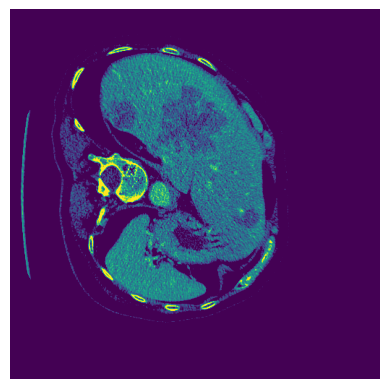

(512, 512)
[0.         0.00392157 0.00784314 0.01176471 0.01568628 0.01960784 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313726 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451  0.06666667 0.07058824 0.07450981 0.07843138 0.08235294 0.08627451 0.09019608 0.09411765 0.09803922 0.10196079 0.10588235 0.10980392 0.11372549 0.11764706 0.12156863 0.1254902  0.12941177 0.13333334 0.13725491 0.14117648 0.14509805 0.14901961 0.15294118 0.15686275 0.16078432 0.16470589 0.16862746 0.17254902 0.1764706  0.18039216 0.18431373 0.1882353  0.19215687 0.19607843 0.2        0.20392157 0.20784314 0.21176471 0.21568628 0.21960784 0.22352941 0.22745098 0.23137255 0.23529412 0.23921569 0.24313726 0.24705882 0.2509804  0.25490198 0.25882354 0.2627451  0.26666668 0.27058825 0.27450982 0.2784314  0.28235295 0.28627452 0.2901961  0.29411766 0.29803923 0.3019608  0.30588236 0.30980393 0.3137255  0.31764707 0.32156864 0.3254902  0.32941177 0.33333334 0.3372549  0.34117648 0.34509805 0.3490196

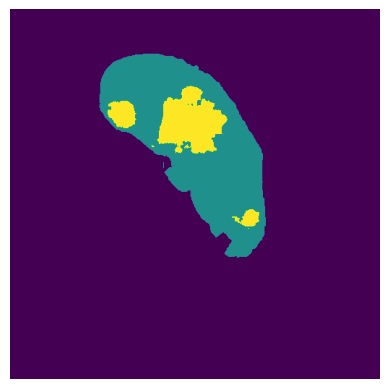

(512, 512)
[0.         0.00392157 0.00784314]


In [21]:
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

img_no = 4000

image_path = NEW_DATASET_DIR + "/" + new_sub_dir[2] +  "/" + sub_sub_dir[0] +  "/" + str(img_no) +".png"
mask_path = NEW_DATASET_DIR + "/" + new_sub_dir[2] +  "/" + sub_sub_dir[1] +  "/" + str(img_no) +".png"

image = mpimg.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()
print(image.shape)
print(np.unique(image))


mask = mpimg.imread(mask_path)
plt.imshow(mask)
plt.axis('off')
plt.show()
print(mask.shape)
print(np.unique(mask))

In [19]:
X_train2 = []
Y_train2 = []

SIZE_Y = 128
SIZE_X = 128

x2 = NEW_DATASET_DIR + "/" + new_sub_dir[2] +  "/" + sub_sub_dir[0] + "/"
y2 = NEW_DATASET_DIR + "/" + new_sub_dir[2] +  "/" + sub_sub_dir[1] + "/"

for directory_path in glob.glob(x2):
  for img_path in glob.glob(os.path.join(directory_path, "*.png")):
    img = cv2.imread(img_path, 0)
    img = cv2.resize(img, (SIZE_Y, SIZE_X))
    X_train2.append(img)

for directory_path in glob.glob(y2):
  for img_path in glob.glob(os.path.join(directory_path, "*.png")):
    img_mask = cv2.imread(img_path, 0)
    img_mask = cv2.resize(img_mask, (SIZE_Y, SIZE_X))
    Y_train2.append(img_mask)


X_train2 = np.array(X_train2)
Y_train2 = np.array(Y_train2)

In [23]:
np.save(NEW_DATASET_DIR + "/" + new_sub_dir[2] + "/X_train128.npy", X_train2) 
np.save(NEW_DATASET_DIR + "/" + new_sub_dir[2] + "/Y_train128.npy", Y_train2)

In [5]:
q = 'D:/TU STUDIES related/SEMESTER 7/Project_Material/dataset/liver nifti dataset lits/segmentations/segmentation-130.nii'

img = nib.load(q)
print(img.shape)

(512, 512, 624)
